In [11]:
#Import packages
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem



In [23]:
#Create a dataframe using results.csv.
df = pd.read_csv("results/Output/results.csv")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


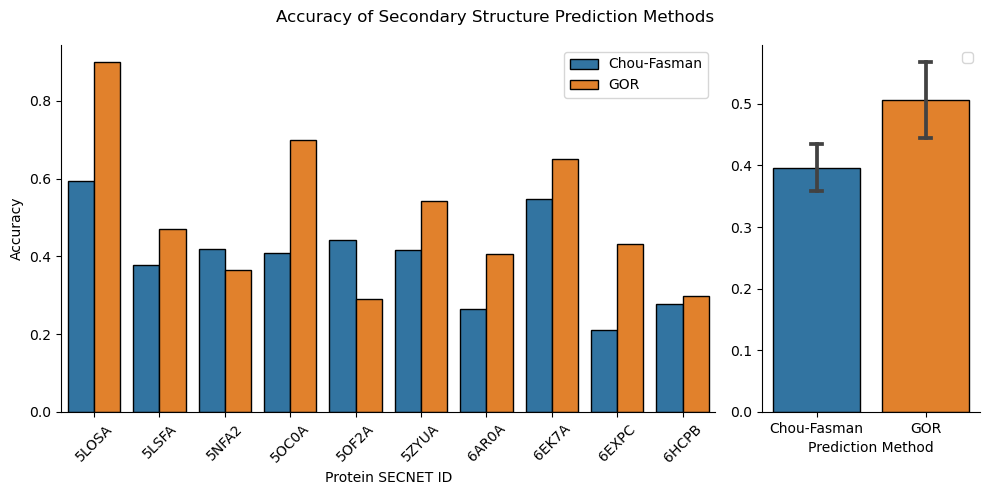

In [24]:
#Create a slice just containing the overall accuracies and melt.
dfm = df[["Protein Name", " accCF", " accGor"]]
dfm = dfm.melt(id_vars = "Protein Name", var_name = "TypePred", value_name = "Accuracy")
#Set palette to colorblind. I am colorblind so it helps me a little, but still not amazing.
sb.color_palette("colorblind")

#Create subplot figures.
fig, ax = plt.subplots(1, 2, figsize = (10, 5),gridspec_kw={'width_ratios': [3, 1]})

#Create a barplot using the accuracy on the left plot for each different protein.
sb.barplot(data = dfm, x= "Protein Name",
            y = "Accuracy", hue = "TypePred", ax = ax[0], capsize = 5, edgecolor = "black")

#Create overall accuracies for CF and GOR.
dfm = df[["Protein Name", " accCF", " accGor"]]
#Plot overall accuracy on the right.
sb.barplot(data = dfm, errorbar = "se" , edgecolor = "black", error_kw={'markeredgewidth':0.005}, capsize =0.1)

#Set the top and right spines for both graphs to be invisible.
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
#Label the X axis as Protein Secnet ID.
ax[0].set_xlabel("Protein SECNET ID")

#Get the handles and labels for the graph.
handles, labels = ax[0].get_legend_handles_labels()

#Reset thje labels for the legend.
ax[0].legend(handles, ['Chou-Fasman', 'GOR'])

#Rotate the xtick labels and center them.
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='center')

#For the right subplot label the x-ticks either ChouFasman or GOR.
ax[1].set_xticklabels(["Chou-Fasman", "GOR"], ha='center')

#Label the right subplot's x-axis as prediction method.
ax[1].set_xlabel("Prediction Method")

#Create a legend for the left subplot.
plt.legend()

#Create a super plot.
plt.suptitle("Accuracy of Secondary Structure Prediction Methods")

#Do tight layout and show plot.
plt.tight_layout()
plt.show()


  Protein Name     accCF    accGor
0        5LOSA  0.593220  0.898305
1        5LSFA  0.378601  0.469136
2        5NFA2  0.419162  0.365269
3        5OC0A  0.407407  0.698413
4        5OF2A  0.442857  0.290476
5        5ZYUA  0.417323  0.543307
6        6AR0A  0.264286  0.407143
7        6EK7A  0.546341  0.651220
8        6EXPC  0.211538  0.432692
9        6HCPB  0.277620  0.298867


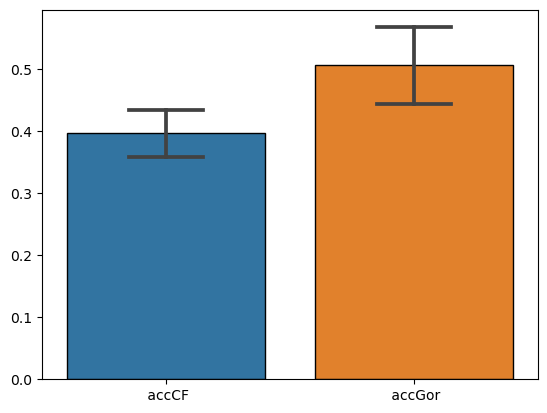

In [25]:
#Create a bar plot to examine overall accuracies of Chou-Fasman accuracies on a separate plot.
sb.barplot(data = dfm, errorbar = "se" , edgecolor = "black", error_kw={'markeredgewidth':0.05}, capsize = 0.3)
#Set the figure size.
plt.figsize = (8,3)
#Print out the data frame.
print(dfm)
#Set the means and the sem's.
meanCF = np.mean(dfm[" accCF"].values)
seCF = sem(dfm[" accCF"].values)
meanGor = np.mean(dfm[" accGor"].values)
seGor = sem(dfm[" accGor"].values)

In [26]:
#Print out the dataframe to examine the accuracies (CF is horrible with sheets).
print(df)

  Protein Name     accCF   accCFHelices   accCFSheets   accCFCoils    accGor  \
0        5LOSA  0.593220       0.634146           NaN     0.500000  0.898305   
1        5LSFA  0.378601       0.125000      0.000000     0.644928  0.469136   
2        5NFA2  0.419162       0.500000      0.032258     0.616788  0.365269   
3        5OC0A  0.407407       0.365854      0.000000     0.542373  0.698413   
4        5OF2A  0.442857       0.560000      0.112500     0.666667  0.290476   
5        5ZYUA  0.417323       0.233010      0.204545     0.682243  0.543307   
6        6AR0A  0.264286            NaN      0.000000     0.500000  0.407143   
7        6EK7A  0.546341       0.459627           NaN     0.863636  0.651220   
8        6EXPC  0.211538       0.380952      0.000000     0.400000  0.432692   
9        6HCPB  0.277620       0.407895      0.008547     0.580645  0.298867   

    accGorHelices   accGorSheets   accGorCoils  
0        0.926829            NaN      0.833333  
1        0.541667    

/var/folders/66/9mt07h917lj07j24jtw0tqgw0000gn/T/ipykernel_11848/3045454933.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","Helix", "", "Sheet","","Coil"])


Text(0, 0.5, 'Accuracy (+/- SE)')

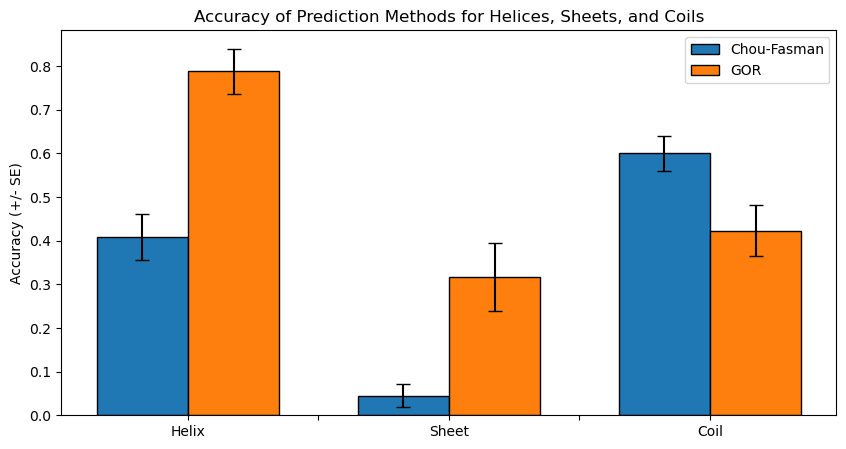

In [27]:

#Find where the accuracies for helices are not NaN.
truth = (df[" accCFHelices"].notna()) & (df[" accGorHelices"].notna())
#Create a sub dataframe where the rows meet those conditions.
dfm = df.loc[truth]

#Create a plot.
fig, ax = plt.subplots(1,1, figsize = (10, 5))


#Create lists of the CF and GOR helix accuracies.
helicesCF = dfm[" accCFHelices"]
helicesGor = dfm[" accGorHelices"]

#Find where the sheets for helices are not NaN.
truth = (df[" accCFSheets"].notna()) & (df[" accGorSheets"].notna())
#Create a sub dataframe where the rows meet those conditions.
dfm = df.loc[truth]
#Create lists of the CF and GOR sheet accuracies.
sheetsCF = dfm[" accCFSheets"]
sheetsGor = dfm[" accGorSheets"]

#Find where the accuracies for coils are not NaN.
truth = (df[" accCFCoils"].notna()) & (df[" accGorCoils"].notna())
#Create a sub dataframe where the rows meet those conditions.
dfm = df.loc[truth]
#Create lists of the CF and GOR accuracies.
coilsCF = dfm[" accCFCoils"]
coilsGor = dfm[" accGorCoils"]




#Create labels of arbitrary length for the bars on the plot.
labels = [1,2,3]
#Create list of label locations.
x = np.arange(len(labels))
#Set width of bars.
width = 0.35  

#Create the bars on the graph.
rects1 = ax.bar(x - width/2, [np.mean(helicesCF),np.mean(sheetsCF), np.mean(coilsCF)], width, yerr= [sem(helicesCF), sem(sheetsCF), sem(coilsCF)], capsize=5, label='Chou-Fasman', edgecolor = "black")
rects2 = ax.bar(x + width/2, [np.mean(helicesGor), np.mean(sheetsGor), np.mean(coilsGor)], width, yerr=[sem(helicesGor), sem(sheetsGor), sem(coilsGor)], capsize=5, label='GOR', edgecolor = "black")

#Create a legend.
plt.legend()

#Only set every other tick to be visible on the plot.
for label in ax.get_xticklabels()[::2]:
    label.set_visible(False)
#Set x-tick label names.
ax.set_xticklabels(["","Helix", "", "Sheet","","Coil"])
#Set plot title and ylabel.
plt.title("Accuracy of Prediction Methods for Helices, Sheets, and Coils")
plt.ylabel("Accuracy (+/- SE)")